<a href="https://colab.research.google.com/github/js0807/ai_study/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import 및 기초다지기(데이터 가공)**

In [ ]:
!pip install seaborn

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.5.0


In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.head()
len(dataset)

398

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset=dataset.dropna()

In [ ]:
len(dataset)

392

In [ ]:
dataset.pop('Origin')

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [ ]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


In [ ]:
train_dataset=dataset.sample(frac=0.8,random_state=0)

In [ ]:
test_dataset=dataset.drop(train_dataset.index)

In [ ]:
len(train_dataset), len(test_dataset)

(314, 78)

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [ ]:
train_labels=train_dataset.pop("MPG")
test_labels=test_dataset.pop("MPG")

In [ ]:
def norm(x):
  return (x-train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971


In [ ]:
normed_train_data.shape

(314, 6)

**데이터 모델 만들기**

In [ ]:
inputs=keras.Input(shape=(normed_train_data.shape[1],))
h=layers.Dense(64)(inputs)
h=layers.Activation('relu')(h) # non-linearity
# h=layers.Dense(64, actiovation='relu)(h) is sum of two upper codes
h=layers.Dense(32)(h)
outputs=layers.Dense(1)(h)

In [ ]:
model=keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
outputs.shape

TensorShape([None, 1])

In [ ]:
inputs.shape

TensorShape([None, 6])

In [ ]:
model.compile(loss='mse',optimizer=tf.keras.optimizers.RMSprop(0.001))

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


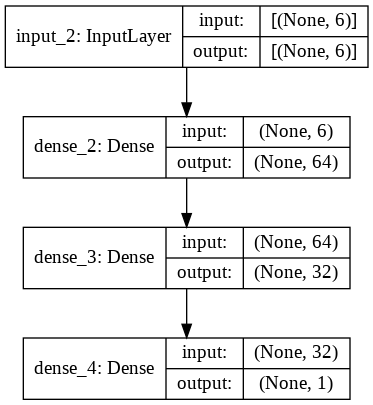

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png",show_shapes=True)

In [ ]:
normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971
...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397


In [ ]:
normed_train_data[:10]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971
257,0.307270,0.351586,-0.390312,0.260397,0.588250,0.571849
310,-0.869348,-1.019044,-1.177792,-1.211344,1.161885,1.115971
328,-0.869348,-0.472709,-0.994047,0.307796,2.237451,1.115971
125,0.307270,0.025702,-0.259066,0.132419,0.337285,-0.516397
108,-0.869348,-0.942365,-0.442811,-0.842816,1.233589,-0.788458


In [ ]:
example_batch=normed_train_data[:5]
example_result=model.predict(example_batch)

In [ ]:
example_result

array([[-0.04993629],
       [ 0.15283337],
       [-0.26564404],
       [ 0.24175054],
       [ 0.19542545]], dtype=float32)

**모델 학습**

In [ ]:
EPOCHS=10

history=model.fit(
    normed_train_data,train_labels,epochs=EPOCHS, validation_split = 0.2
)

Epoch 1/10
8/8 [==============================] - 1s 21ms/step - loss: 584.3074 - val_loss: 587.2073
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 552.2714 - val_loss: 559.4545
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 527.6818 - val_loss: 534.4429
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 506.5378 - val_loss: 514.6097
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 485.6735 - val_loss: 493.0927
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 464.1948 - val_loss: 470.6008
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 440.4505 - val_loss: 445.5078
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 413.9909 - val_loss: 417.4497
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 384.7486 - val_loss: 386.6996
Epoch 10/10
8/8 [==============================] - 0s 5ms/step - loss: 352.1958 - val_loss: 352.994

In [ ]:
EPOCHS=100

history=model.fit(
    normed_train_data,train_labels,epochs=EPOCHS, validation_split = 0.2
)

Epoch 1/100
8/8 [==============================] - 0s 12ms/step - loss: 317.5220 - val_loss: 315.9949
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 282.8665 - val_loss: 278.7812
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 244.2474 - val_loss: 241.1720
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 206.1197 - val_loss: 202.2149
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 168.4931 - val_loss: 164.3473
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 132.3867 - val_loss: 128.1550
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 99.4857 - val_loss: 95.7457
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 70.5506 - val_loss: 68.5891
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 47.5104 - val_loss: 45.3813
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 31.4887 - val_loss: 30.2

In [ ]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
model.fit(
    normed_train_data,
    train_labels,
    epochs=EPOCHS,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 12.6985 - val_loss: 11.8062
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 12.6853 - val_loss: 11.8570
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 12.3939 - val_loss: 12.3632
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 12.6885 - val_loss: 12.0189
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 12.5417 - val_loss: 12.0663
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 12.4606 - val_loss: 12.2016
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 12.5465 - val_loss: 12.3751
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 12.6330 - val_loss: 12.2278
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 12.4591 - val_loss: 12.5360
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 12.5052 - val_loss: 11.9302
Epoch 11

In [ ]:
loss = model.evaluate(normed_test_data, test_labels, verbose=2)

3/3 - 0s - loss: 10.7269


**예측**

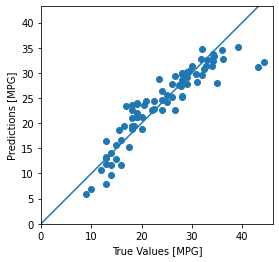

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

**마무리**

궁금한점


*   함수의 W와 b값의 변화를 관찰하고 싶다. => **다음 시간에 해보자...**
*   더 정확도를 높이려면 어떻게 해야하는지 => **다음 강의에 나옴**
*   loss는 대체 어떻게 구하는지 영문을 모르겠다. MPG 값도 빼고 뭐하고 했는데 그걸 자기 알아서 처리하는것에 대해서 궁금하다.
*   간단하게 넘어간 mse나 RMSProp 등 기본 개념 공부가 필요할 것 같다.



해야할 것


*   함수 W,b 값 보는 코드 추가
*   loss값 구하는 로직 확인하기. (코드 보기)
*   머신러닝 기본 개념 공부

